In [77]:
# Magic to automatically update imports if functions in utils are changed
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
stores_train = pd.read_csv("data/stores_train.csv")

In [79]:
stores_train.shape

(12859, 12)

In [80]:
stores_train.dtypes

store_id                object
year                     int64
store_name              object
plaace_hierarchy_id     object
sales_channel_name      object
grunnkrets_id            int64
address                 object
lat                    float64
lon                    float64
chain_name              object
mall_name               object
revenue                float64
dtype: object

In [81]:
train_num = stores_train.select_dtypes(include=[np.float64, np.int64])

In [82]:
train_num.shape

(12859, 5)

In [83]:
train_num["log_revenues"] = train_num["revenue"].apply(lambda x: np.log10(x+0.1))

/var/folders/0n/8hp9d_rj4_9d8vgrqztmqhf40000gn/T/ipykernel_35582/2539027141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num["log_revenues"] = train_num["revenue"].apply(lambda x: np.log10(x+0.1))


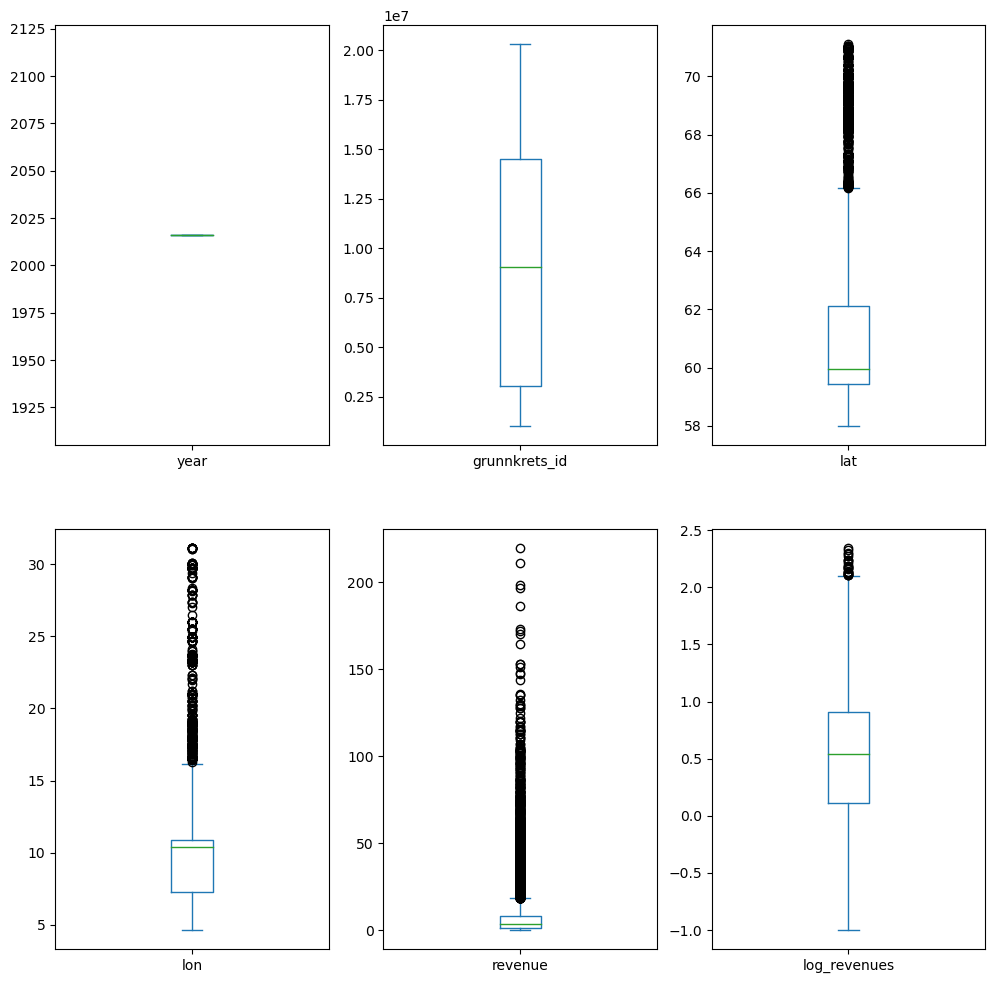

In [84]:
train_num.plot(kind="box", subplots=True, layout=(2,3), figsize=(12,12));

In [85]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from utils import CustomTransformer

In [86]:
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")), 
        ("scaler", StandardScaler(with_mean=True, with_std=True))]
)

In [87]:
train_num_sd = numerical_transformer.fit_transform(train_num)

In [88]:
train_num_sd = pd.DataFrame(train_num_sd, index=train_num.index, columns=train_num.columns)

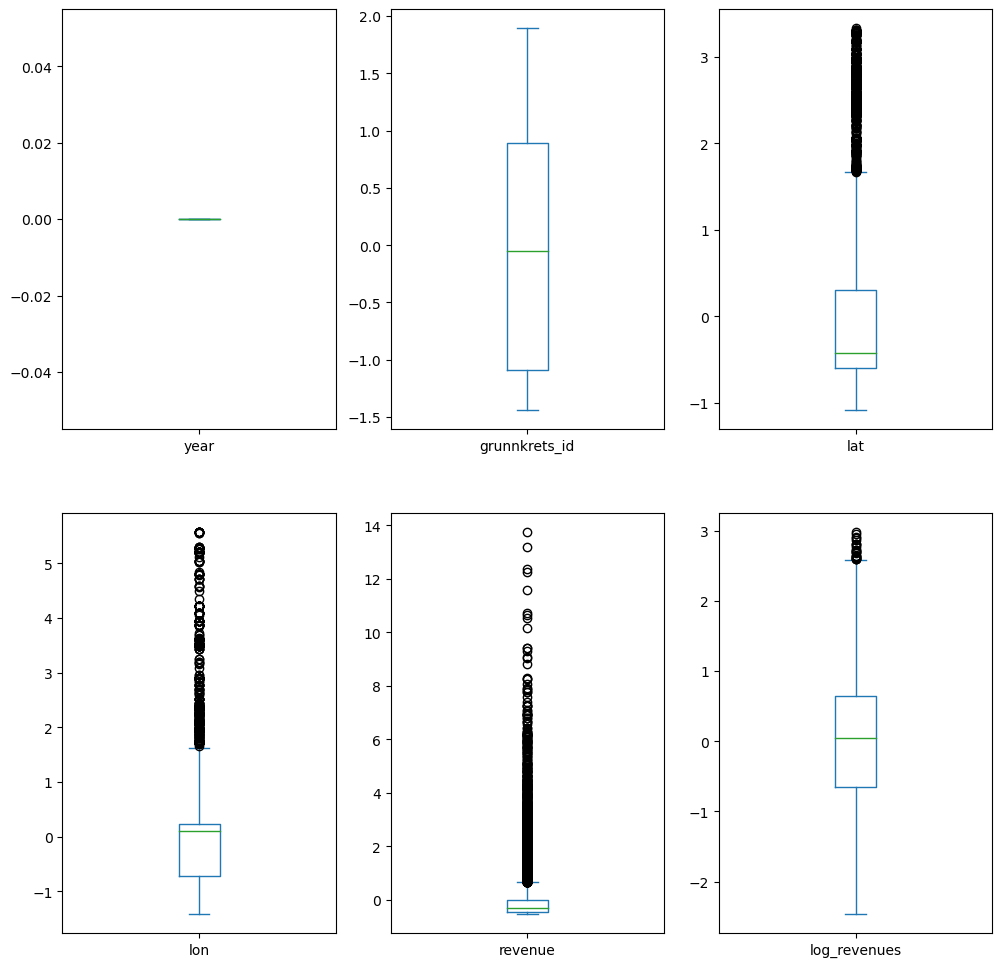

In [89]:
train_num_sd.plot(kind="box", subplots=True, layout=(2,3), figsize=(12,12));

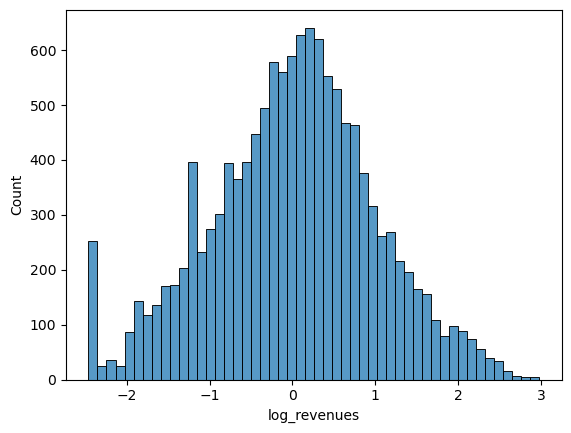

In [90]:
sns.histplot(train_num_sd.log_revenues);

In [91]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_zscore(train_num.revenue)
print("# of utliers from Z-scores method: ", len(sample_outliers))

# of utliers from Z-scores method:  328


In [92]:
stores_test = pd.read_csv("data/stores_test.csv")

In [94]:
stores_train.revenue.value_counts()

0.000     217
0.500     187
1.000      55
10.000     34
0.125      21
         ... 
66.367      1
16.966      1
4.335       1
18.750      1
2.328       1
Name: revenue, Length: 7971, dtype: int64

In [143]:
top_n = 500
least_revenue = stores_train.sort_values(by=["revenue"], ascending=True).head(top_n)
most_revenue = stores_train.sort_values(by=["revenue"], ascending=False).head(top_n)
random_revenue = stores_train.sample(top_n)

## Check geographical location

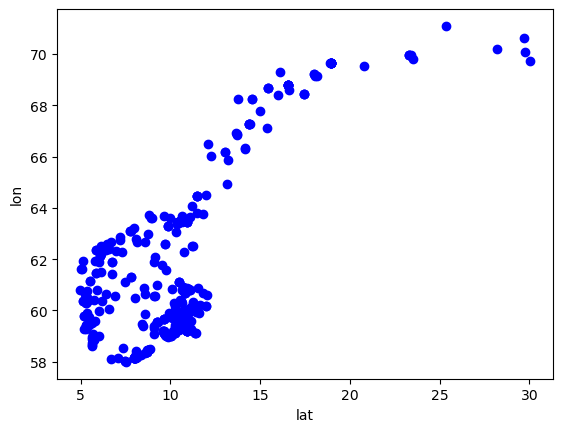

In [144]:
plt.plot(random_revenue["lon"], random_revenue["lat"], "bo")
plt.ylabel("lon")
plt.xlabel("lat")
plt.show();

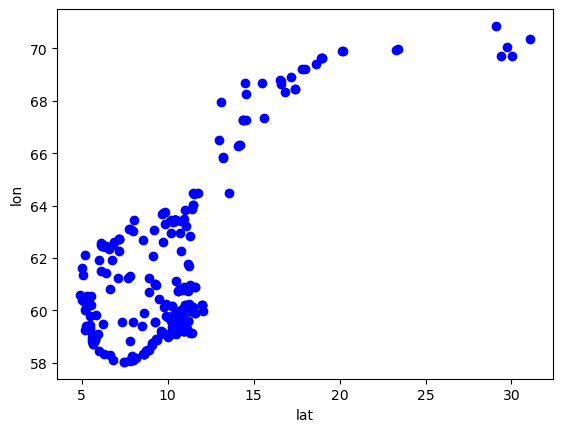

In [145]:
plt.plot(least_revenue["lon"], least_revenue["lat"], "bo")
plt.ylabel("lon")
plt.xlabel("lat")
plt.show();

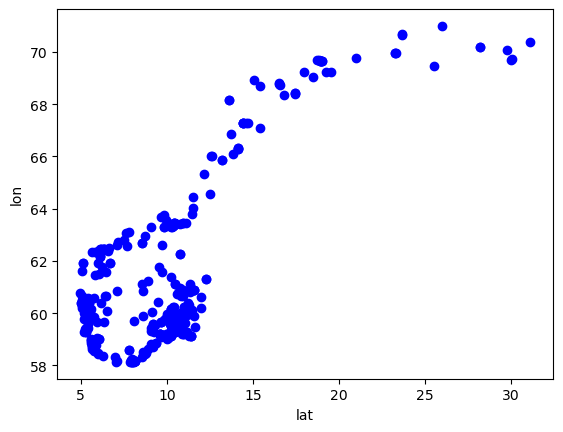

In [146]:
plt.plot(most_revenue["lon"], most_revenue["lat"], "bo")
plt.ylabel("lon")
plt.xlabel("lat")
plt.show();

## Check distribution of categories

In [170]:
def create_pie_chart(df_column, top_n = 10):
    df_col_dict = dict(df_column.value_counts())
    df_col_labels = list(df_col_dict.keys())
    df_col_values = list(df_col_dict.values())
    new_df_col_labels = df_col_labels[:top_n]
    new_df_col_labels.append("Other")
    new_df_col_values = df_col_values[:top_n]
    new_df_col_values.append(sum(df_col_values[top_n:]))
    plt.pie(new_df_col_values, labels = new_df_col_labels, autopct='%.0f%%')
    plt.show()

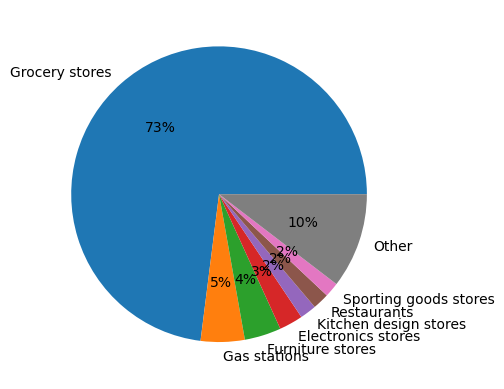

In [171]:
create_pie_chart(most_revenue.sales_channel_name, top_n=7)

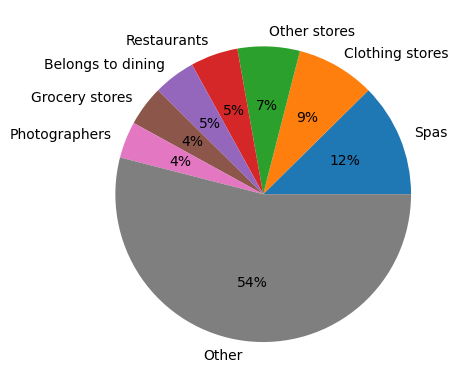

In [169]:
create_pie_chart(least_revenue.sales_channel_name, top_n=7)

In [152]:
zero_rev_stores = stores_train[stores_train["revenue"] == 0]

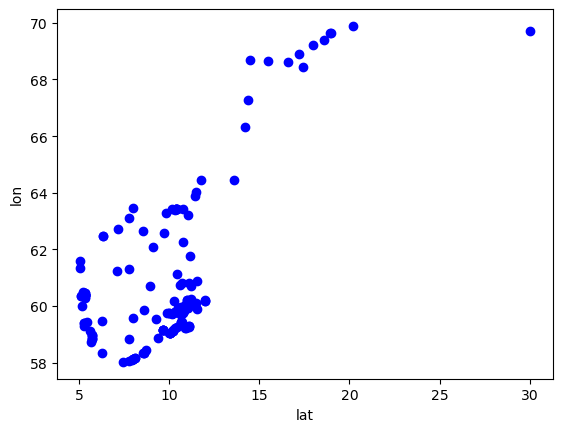

In [154]:
plt.plot(zero_rev_stores["lon"], zero_rev_stores["lat"], "bo")
plt.ylabel("lon")
plt.xlabel("lat")
plt.show();

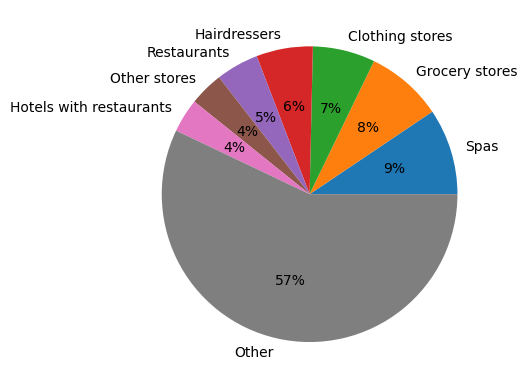

In [172]:
create_pie_chart(stores_train.sales_channel_name, top_n=7)